
# Credit Card Fraud Detection Project

This project aims to detect fraudulent credit card transactions using advanced machine learning techniques, leveraging imbalanced data handling and optimization methods. Given the significant impact of fraud on financial institutions and customers, this model targets both high accuracy and reliability in identifying fraudulent transactions.

## Objectives:
- **Effective Fraud Detection**: Minimize false positives and negatives to ensure high model reliability.
- **Class Imbalance Management**: Implement techniques to address the low fraud ratio of 0.172%, ensuring accurate detection of rare events.
- **Model Optimization**: Utilize hyperparameter tuning to enhance model performance.


In [7]:

# Install required libraries (uncomment if running in a new environment)
!pip install xgboost imblearn lightgbm


In [8]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Model Evaluation Metrics
from sklearn.metrics import f1_score, precision_recall_curve, auc, roc_auc_score

# Machine Learning Models and Sampling Techniques
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

# Data Preprocessing and Model Selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier


In [9]:

# Load Dataset (Adjust path if necessary)

# If using Google Colab, uncomment the following to mount Google Drive:
from google.colab import drive
drive.mount('/content/drive')

# Example file path in Google Drive (update path as needed):
file_path = '/content/drive/MyDrive/Projects/fraud detection project/creditcard.csv'

# Load data into DataFrame
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



## Exploratory Data Analysis (EDA)

To understand the dataset and the degree of class imbalance, we first examine the class distribution. The low prevalence of fraudulent transactions (0.172%) requires specialized handling to ensure effective model training.


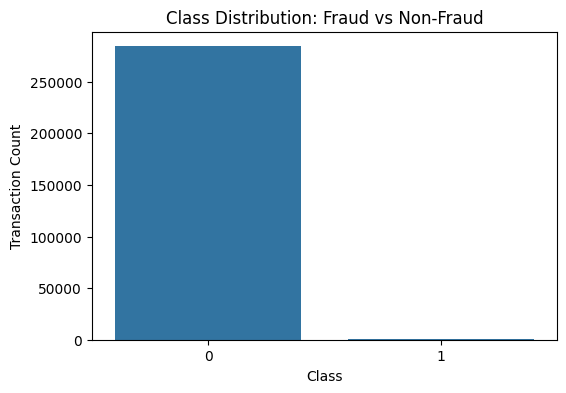

In [10]:

# Visualizing class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution: Fraud vs Non-Fraud')
plt.xlabel('Class')
plt.ylabel('Transaction Count')
plt.show()


In [6]:
df.shape

(284807, 31)


## Evaluation Metrics
Given the imbalanced nature of the dataset, we prioritize metrics that provide insight into both precision and recall, with particular emphasis on the **Area Under the Precision-Recall Curve (AUPRC)**.

- **Precision-Recall Curve (AUPRC)**: Helps us understand the model's ability to correctly identify frauds relative to non-frauds.
- **F1 Score**: Balances precision and recall to ensure both missed frauds and false alarms are minimized.


In [ ]:
# Display all columns in the DataFrame
pd.set_option('display.max_columns', None)

# Show the DataFrame (or head of it) with all columns
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# **Visualization**

In [11]:
# Load the data
data = df.copy()

Time Series Analysis Over Two Days
This plot shows transaction activity over the two-day period, separated by fraud and non-fraud cases.

Explanation:
Time is converted to days to visualize transactions across the two days. Histograms for fraud and non-fraud transactions help identify any time-specific fraud patterns.

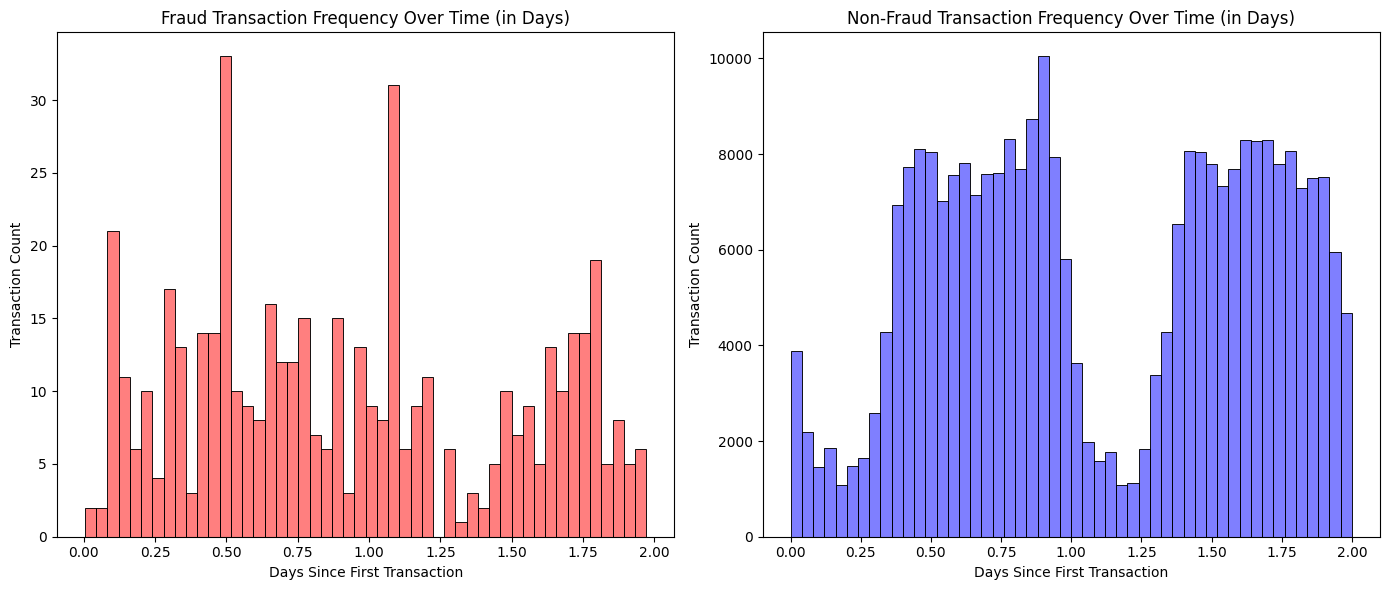

In [ ]:
# Convert Time feature from seconds to days
data['Time_days'] = data['Time'] / (60 * 60 * 24)  # Time in days since first transaction

plt.figure(figsize=(14, 6))

# Create the first subplot for Fraud transactions
plt.subplot(1, 2, 1)
sns.histplot(data[data['Class'] == 1]['Time_days'], bins=50, color='red', alpha=0.5)
plt.title("Fraud Transaction Frequency Over Time (in Days)")
plt.xlabel("Days Since First Transaction")
plt.ylabel("Transaction Count")

# Create the second subplot for Non-Fraud transactions
plt.subplot(1, 2, 2)
sns.histplot(data[data['Class'] == 0]['Time_days'], bins=50, color='blue', alpha=0.5)
plt.title("Non-Fraud Transaction Frequency Over Time (in Days)")
plt.xlabel("Days Since First Transaction")
plt.ylabel("Transaction Count")

plt.tight_layout()  # Adjust spacing between plots
plt.show()

Amount-Based Analysis with Cost-Sensitive Implications
This visualization uses a KDE plot to explore transaction amount distribution for fraud and non-fraud cases.

Explanation:
sns.kdeplot displays the distribution of Amount for fraud and non-fraud classes, indicating if certain transaction values are more fraud-prone.

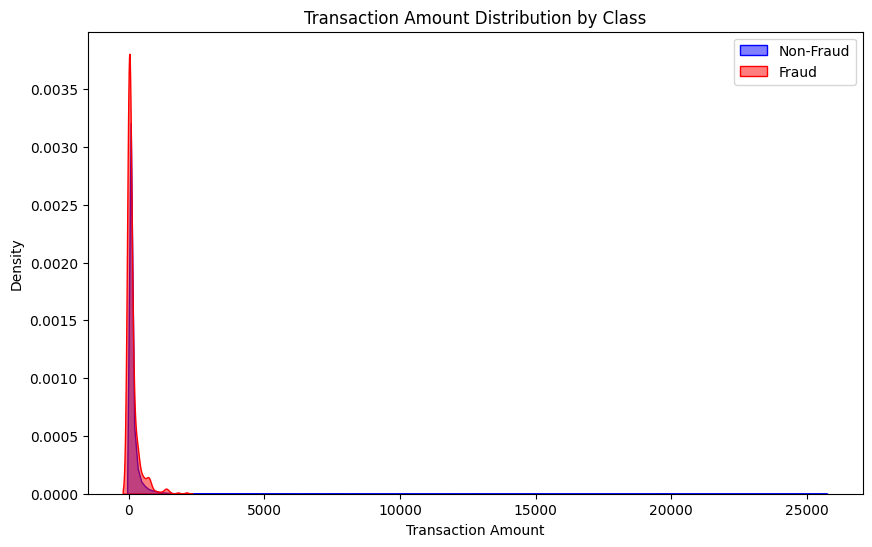

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data[data['Class'] == 0]['Amount'], color='blue', label='Non-Fraud', fill=True, alpha=0.5)
sns.kdeplot(data[data['Class'] == 1]['Amount'], color='red', label='Fraud', fill=True, alpha=0.5)
plt.title("Transaction Amount Distribution by Class")
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.legend()
plt.show()

Class-Specific Variability in PCA Components
Using a 2D scatter plot and box plots for selected components (V1, V2, V3, etc.) to examine fraud-related patterns in PCA features.

Scatter Plot for Two PCA Components (V1 vs. V2)

Explanation:
This scatter plot for V1 and V2 (first two PCA components) may reveal separations between fraud and non-fraud transactions, if present.


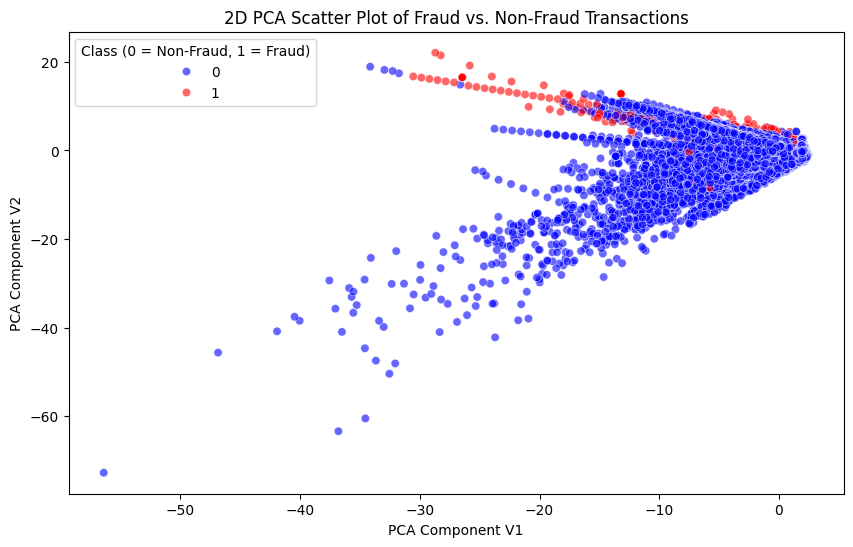

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='V1', y='V2', hue='Class', data=data, palette={0: 'blue', 1: 'red'}, alpha=0.6)
plt.title("2D PCA Scatter Plot of Fraud vs. Non-Fraud Transactions")
plt.xlabel("PCA Component V1")
plt.ylabel("PCA Component V2")
plt.legend(title="Class (0 = Non-Fraud, 1 = Fraud)")
plt.show()

Box Plots for Selected PCA Components by Class

Explanation:
Box plots display variability in V1 to V4 by Class. This layout is simplified for a few components but can be expanded to analyze all components V1 to V28.

<ipython-input-12-0a7d53859863>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=f'V{i}', data=data, palette="Set2")
<ipython-input-12-0a7d53859863>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=f'V{i}', data=data, palette="Set2")
<ipython-input-12-0a7d53859863>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y=f'V{i}', data=data, palette="Set2")
<ipython-input-12-0a7d53859863>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` va

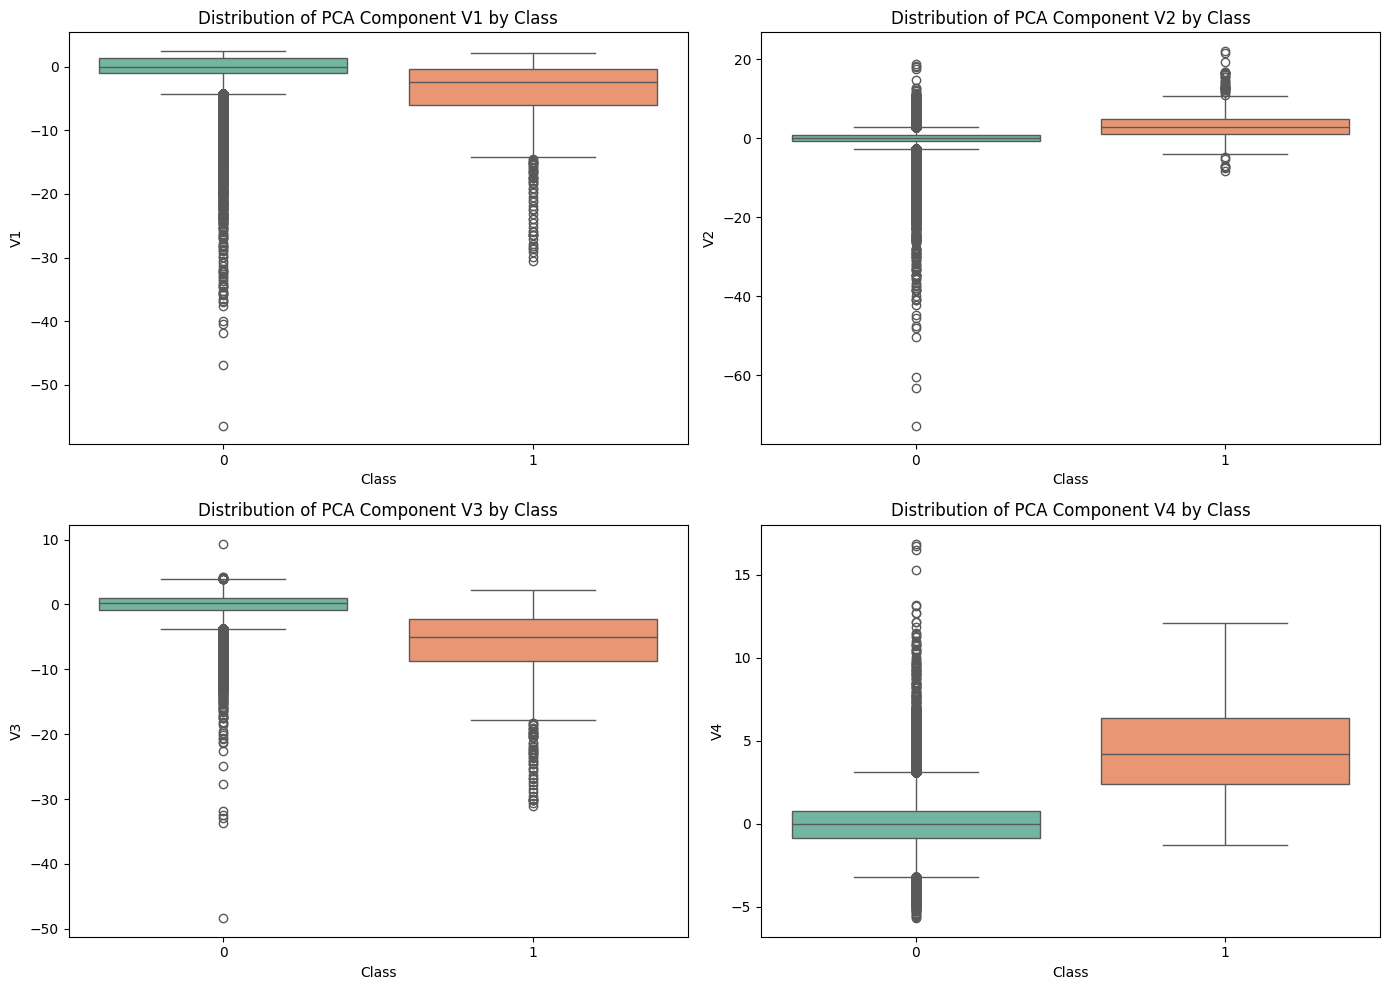

In [ ]:
# Create box plots for a subset of PCA components (e.g., V1 to V4)
plt.figure(figsize=(14, 10))
for i in range(1, 5):  # Visualize V1 to V4 for clarity
    plt.subplot(2, 2, i)
    sns.boxplot(x='Class', y=f'V{i}', data=data, palette="Set2")
    plt.title(f"Distribution of PCA Component V{i} by Class")
plt.tight_layout()
plt.show()


Correlation Heatmap of PCA Components
Visualize the correlation among PCA components to confirm independence or remaining relationships.

Explanation:
The correlation heatmap confirms if the PCA transformation effectively reduced correlations between components, which is expected in PCA-transformed data.
These visualizations help provide a robust analysis of patterns in fraud detection data with PCA-transformed components and emphasize time, amount, and class differences.

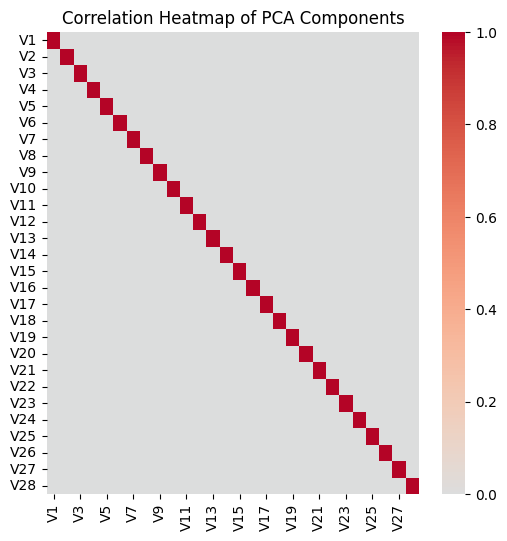

In [ ]:
plt.figure(figsize=(6, 6))
corr_matrix = data.loc[:, 'V1':'V28'].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False, fmt=".2f")
plt.title("Correlation Heatmap of PCA Components")
plt.show()

## Model Comparison

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Define the models for comparison
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier()
}

# Define a function to calculate AUPRC
def calculate_auprc(y_true, y_scores):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    return auc(recall, precision)

# Dictionary to store results
results = {'Model': [], 'F1 Score': [], 'ROC AUC': [], 'AUPRC': []}

# Initialize StratifiedKFold for consistent cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate each model
for model_name, model in models.items():
    # Cross-validate with F1 Score
    f1 = cross_val_score(model, X_train_res, y_train_res, cv=skf, scoring='f1').mean()

    # Train and predict probabilities for ROC AUC and AUPRC on test data
    model.fit(X_train_res, y_train_res)
    y_pred_probs = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    roc_auc = roc_auc_score(y_test, y_pred_probs)
    auprc = calculate_auprc(y_test, y_pred_probs)

    # Store results
    results['Model'].append(model_name)
    results['F1 Score'].append(f1)
    results['ROC AUC'].append(roc_auc)
    results['AUPRC'].append(auprc)

# Display results
results_df = pd.DataFrame(results)
print("Model Performance Comparison:")
print(results_df.sort_values(by='AUPRC', ascending=False))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:14:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:14:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:14:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:14:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:15:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

[LightGBM] [Info] Number of positive: 159216, number of negative: 159216
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.100130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 318432, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 159216, number of negative: 159216
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.113600 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 318432, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 159216, number of negative: 159216
[LightGBM] [Info] Auto-choosing col-wise mu

# After training multiple models, we compare their performance across key metrics.

| Model               | F1 Score  | ROC AUC   | AUPRC     |
|---------------------|-----------|-----------|-----------|
| Random Forest       | 0.999894  | 0.959214  | 0.831257  |
| XGBoost             | 0.999749  | 0.970824  | 0.819988  |
| LightGBM            | 0.999320  | 0.960441  | 0.788150  |
| Logistic Regression  | 0.958669  | 0.965989  | 0.742791  |


# Applying RandomForest

Area Under the Precision-Recall Curve (AUPRC): 0.8542


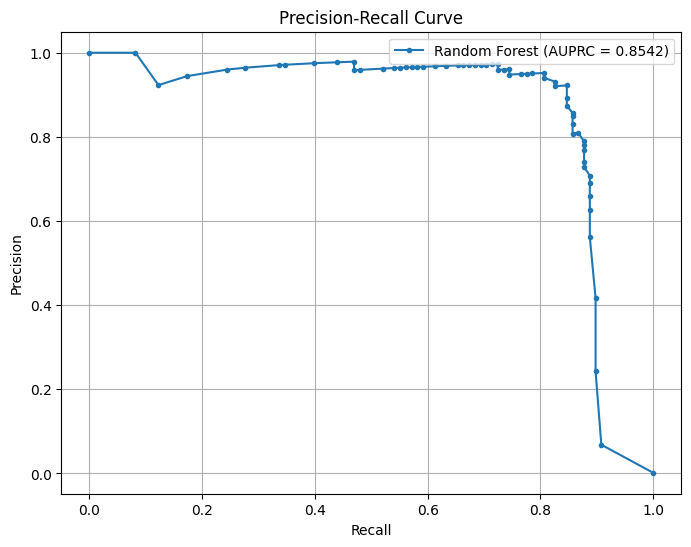

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Features and target variable
X = data.drop('Class', axis=1)  # Features (all columns except 'Class')
y = data['Class']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest classifier with class weighting
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_scores = rf_model.predict_proba(X_test)[:, 1]  # Get the predicted probabilities for the positive class

# Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate AUPRC
auprc = average_precision_score(y_test, y_scores)
print(f'Area Under the Precision-Recall Curve (AUPRC): {auprc:.4f}')

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Random Forest (AUPRC = {:.4f})'.format(auprc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


# Applying XGBoost

In [13]:
# Required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Scale 'Time' and 'Amount'
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Resample using SMOTE
smote = SMOTE(random_state=42)
X_res_smote, y_res_smote = smote.fit_resample(X_train, y_train)

# Feature engineering: Polynomial features for 'Time' and 'Amount'
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_features = poly.fit_transform(X[['Time', 'Amount']])

# Append new features back to the dataset
X_poly = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['Time', 'Amount']))
X_extended = pd.concat([X, X_poly], axis=1)

# Train-test split for extended features
X_train_extended, X_test_extended, y_train_extended, y_test_extended = train_test_split(
    X_extended, y, test_size=0.2, random_state=42, stratify=y)

# Train XGBoost with early stopping
xgb_early_stopping = XGBClassifier(
    eval_metric='logloss',
    n_estimators=500,
    early_stopping_rounds=50,
    reg_alpha=0.5,
    reg_lambda=1.5,
    random_state=42
)

# Fit model with early stopping
xgb_early_stopping.fit(X_res_smote, y_res_smote, eval_set=[(X_test, y_test)], verbose=False)

# Function to calculate AUPRC
def calculate_auprc(model, X_test, y_test):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    pr_auc = auc(recall, precision)
    return pr_auc

# Calculate AUPRC for XGBoost with early stopping
xgb_early_stopping_auprc = calculate_auprc(xgb_early_stopping, X_test, y_test)

# Display AUPRC
print(f'AUPRC for XGBoost (Early Stopping): {xgb_early_stopping_auprc}')

AUPRC for XGBoost (Early Stopping): 0.8786871789577199


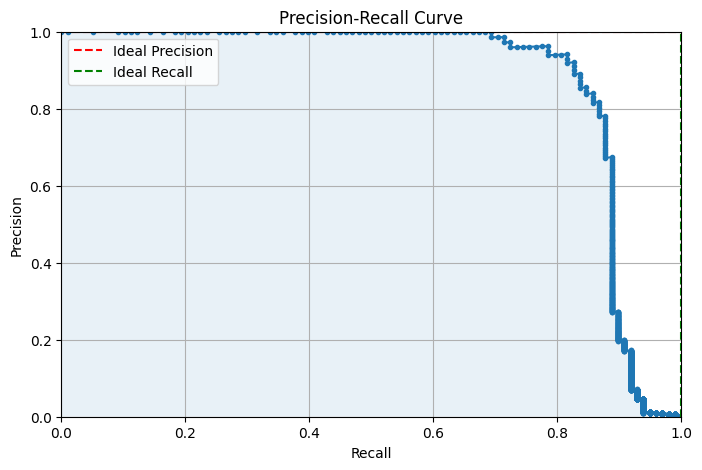

AUPRC for XGBoost (Early Stopping): 0.8786871789577199


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate precision and recall
y_pred_prob = xgb_early_stopping.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, marker='.')
plt.fill_between(recall, precision, alpha=0.1)
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid()
plt.axhline(y=1.0, color='r', linestyle='--', label='Ideal Precision')
plt.axvline(x=1.0, color='g', linestyle='--', label='Ideal Recall')
plt.legend()
plt.show()

# Display AUPRC
print(f'AUPRC for XGBoost (Early Stopping): {xgb_early_stopping_auprc}')
